<a href="https://colab.research.google.com/github/ayusjayaswal/imageman/blob/main/stable_diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install --quiet --upgrade diffusers transformers accelerate invisible_watermark mediapy omegaconf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 104.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 75.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 99.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 68.0 MB/s eta 0:00:00


In [2]:
use_refiner = False

In [5]:
import mediapy as media
import random
import sys
import torch

from diffusers import DiffusionPipeline

model = "digiplay/Realisian_v5" # @param ["digiplay/Realisian_v5", "stabilityai/stable-diffusion-xl-base-1.0", "hakurei/waifu-diffusion", "Linaqruf/anything-v3.0"]

pipe = DiffusionPipeline.from_pretrained(
    model,
    torch_dtype=torch.float16,
    safety_checker=None,
    requires_safety_checker=False
)

pipe = pipe.to("cuda")

model_index.json:   0%|          | 0.00/584 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/520 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/507 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.69k [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/582 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


Token indices sequence length is longer than the specified maximum sequence length for this model (163 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["open - source symbols, symbolizing the fight for digital freedom. the tech corporations are represented by large, faceless corporate giants with glowing eyes, symbolizing control and surveillance. the atmosphere is tense, with digital clouds and streams of data swirling above, showing a clash between individuality and corporate power. in the background, there's a small group of tech activists rallying around tux, supporting the cause for privacy and online freedom."]


  0%|          | 0/50 [00:00<?, ?it/s]

Prompt:	Realistic, A dynamic and heroic scene of Tux, the Linux penguin, standing tall as a symbol of freedom and privacy, facing off against shadowy figures representing powerful tech corporations. Tux is in a futuristic cityscape, surrounded by dark, looming skyscrapers adorned with corporate logos, emitting ominous glows. Tux holds a large shield made of binary code and a sword that shines with open-source symbols, symbolizing the fight for digital freedom. The tech corporations are represented by large, faceless corporate giants with glowing eyes, symbolizing control and surveillance. The atmosphere is tense, with digital clouds and streams of data swirling above, showing a clash between individuality and corporate power. In the background, there's a small group of tech activists rallying around Tux, supporting the cause for privacy and online freedom.
Seed:	4434828682


""

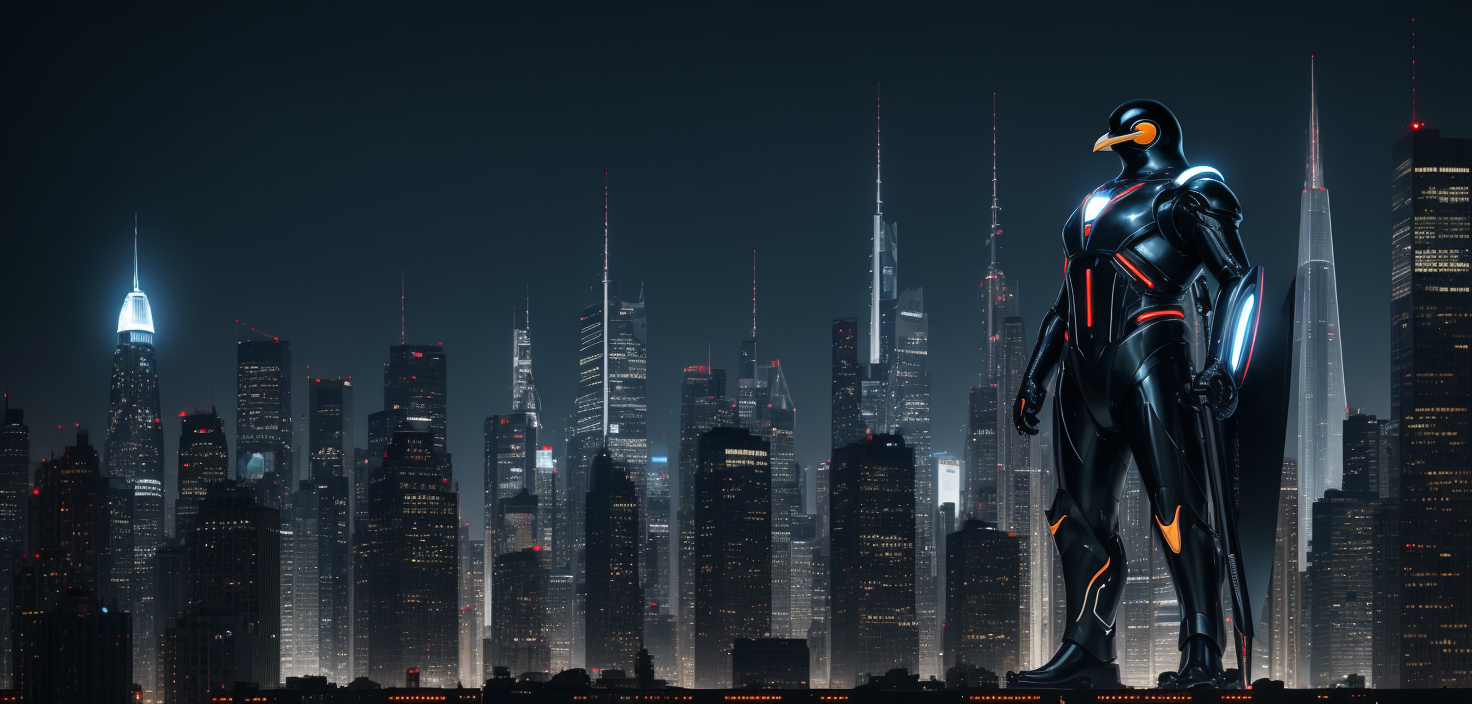

In [6]:
import os
prompt = "Realistic, A dynamic and heroic scene of Tux, the Linux penguin, standing tall as a symbol of freedom and privacy, facing off against shadowy figures representing powerful tech corporations. Tux is in a futuristic cityscape, surrounded by dark, looming skyscrapers adorned with corporate logos, emitting ominous glows. Tux holds a large shield made of binary code and a sword that shines with open-source symbols, symbolizing the fight for digital freedom. The tech corporations are represented by large, faceless corporate giants with glowing eyes, symbolizing control and surveillance. The atmosphere is tense, with digital clouds and streams of data swirling above, showing a clash between individuality and corporate power. In the background, there's a small group of tech activists rallying around Tux, supporting the cause for privacy and online freedom." #@param {type:"string"}
seed = 4434828682 # @param {type:"slider", min:0, max:9000000000, step:1}

negative_prompt = "bad-picture-chill-75v, blurry,cartoon,ng_deepnegative_v1_75t, badhandv4, (worst quality:2), (low quality:2), (normal quality:2), (lowres:2), (bad anatomy:2), (bad hands:2), (watermark:2), (mole:1.5), (freckles:1.5)" #@param {type:"string"}

width = 1472  #@param {type:"slider", min:8, max:2048, step:8}
height = 704  #@param {type:"slider", min:8, max:2048, step:8}

# Mengambil nilai dari widget param
width = int(width)
height = int(height)
images = pipe(
    prompt=prompt,
    width=width,
    height=height,
    negative_prompt=negative_prompt,
    output_type="latent" if use_refiner else "pil",
    generator=torch.Generator().manual_seed(seed)
).images


if use_refiner:
  images = refiner(
      prompt = prompt,
      negative_prompt = negative_prompt,
      image = images,
      ).images

print(f"Prompt:\t{prompt}\nSeed:\t{seed}")

# Nama file yang akan digunakan
base_filename = "output.jpg"
new_filename = base_filename

# Cek apakah file dengan nama yang sama sudah ada
if os.path.exists(base_filename):
    # Jika sudah ada, tambahkan angka di belakangnya
    index = 1
    while True:
        new_filename = f"output_{index}.jpg"
        if not os.path.exists(new_filename):
            break
        index += 1

# Simpan gambar dengan nama yang telah ditentukan
images[0].save(new_filename)

# Menampilkan gambar
media.show_images(images)
